<a href="https://colab.research.google.com/github/zaffykhan/DataScience/blob/main/Stock_Price_Analysis_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzed the adjusted close prices for FB, MMM, IBM, and AMZN over the last 60 months, resampled to month-end prices, and investigated the autocorrelation and inter-stock correlation using Python and pandas, revealing insights into stock behavior and interrelations.

TOOLS AND Technologies: Financial Analysis, Python, pandas, Data Visualization (matplotlib, seaborn), Time Series Analysis

Key Contributions:

Conducted comprehensive analysis of stock price data to identify trends and correlations.
Resampled and analyzed monthly stock prices to assess performance over time.
Visualized and interpreted autocorrelation and cross-correlation to inform investment strategies.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [ ]:
NAME = "Muneeb Zafar Khan"

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data.

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)*
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function.
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:**
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account.
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account.

**NOTE**: You can remove this key before submitting the assignment.

### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
## TYPE YOUE CODE BELOW

In [ ]:
"""1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments."""

'1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.'

In [ ]:
pip install pandas yfinance


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [ ]:
"""2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment."""

'2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.'

In [ ]:
import datetime

# Define a list of stock tickers
stock_tickers = ['AMZN', 'META', 'IBM', 'MMM']

# Calculate the end date as the desired end date
end_date = datetime.datetime.now()

# Calculate the start date as 60 months before the end date
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=60)

# Download historical data for each stock for the last 60 months
data = yf.download(stock_tickers, start=start_date, end=end_date)

print(data)


[*********************100%%**********************]  4 of 4 completed

Price        Adj Close                                           Close  \
Ticker            AMZN         IBM        META         MMM        AMZN   
Date                                                                     
2019-04-08   92.492996  107.681351  174.744583  139.687317   92.492996   
2019-04-09   91.792000  106.720116  177.391785  137.699356   91.792000   
2019-04-10   92.366501  107.403496  177.631531  137.796799   92.366501   
2019-04-11   92.203499  107.974220  177.321854  138.719315   92.203499   
2019-04-12   92.153000  108.402275  178.910187  141.246414   92.153000   
...                ...         ...         ...         ...         ...   
2024-04-01  180.970001  189.830002  491.350006   94.019997  180.970001   
2024-04-02  180.690002  188.880005  497.369995   92.839996  180.690002   
2024-04-03  182.410004  190.899994  506.739990   93.190002  182.410004   
2024-04-04  180.000000  187.940002  510.920013   90.540001  180.000000   
2024-04-05  185.070007  189.139999  52

In [ ]:
"""3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock."""

'3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.'

In [ ]:
data['Adj Close']

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-04-08,92.492996,107.681351,174.744583,139.687317
2019-04-09,91.792000,106.720116,177.391785,137.699356
2019-04-10,92.366501,107.403496,177.631531,137.796799
2019-04-11,92.203499,107.974220,177.321854,138.719315
2019-04-12,92.153000,108.402275,178.910187,141.246414
...,...,...,...,...
2024-04-01,180.970001,189.830002,491.350006,94.019997
2024-04-02,180.690002,188.880005,497.369995,92.839996
2024-04-03,182.410004,190.899994,506.739990,93.190002


In [ ]:
data['Adj Close'].isnull().sum()

Ticker
AMZN    0
IBM     0
META    0
MMM     0
dtype: int64

In [ ]:
# Resample the data to get end of month prices
monthly_data = data['Adj Close'].resample('BM').last()

print(monthly_data)

Ticker            AMZN         IBM        META         MMM
Date                                                      
2019-04-30   96.325996  105.338326  193.195007  123.114784
2019-05-31   88.753502   96.498268  177.281906  104.845062
2019-06-28   94.681503  104.788666  192.795441  113.764275
2019-07-31   93.338997  112.645897  194.024139  114.669952
2019-08-30   88.814499  104.201187  185.473206  107.301613
...                ...         ...         ...         ...
2023-12-29  151.940002  162.072403  353.584839   89.618561
2024-01-31  155.199997  182.000717  389.726501   77.346428
2024-02-29  176.759995  185.029999  490.130005   77.023415
2024-03-29  180.380005  190.960007  485.579987   88.687294
2024-04-30  185.070007  189.139999  527.340027   91.029999

[61 rows x 4 columns]


In [ ]:
monthly_data.isnull().sum()

Ticker
AMZN    0
IBM     0
META    0
MMM     0
dtype: int64

In [ ]:
"""4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation."""

"""
Answer: There is strong autocorrelation in the AMZN and META stocks. Whereas there no significant autocorrelation in the IBM and MMM stocks.
"""

'\nAnswer: There is strong autocorrelation in the AMZN and META stocks. Whereas there no significant autocorrelation in the IBM and MMM stocks.\n'

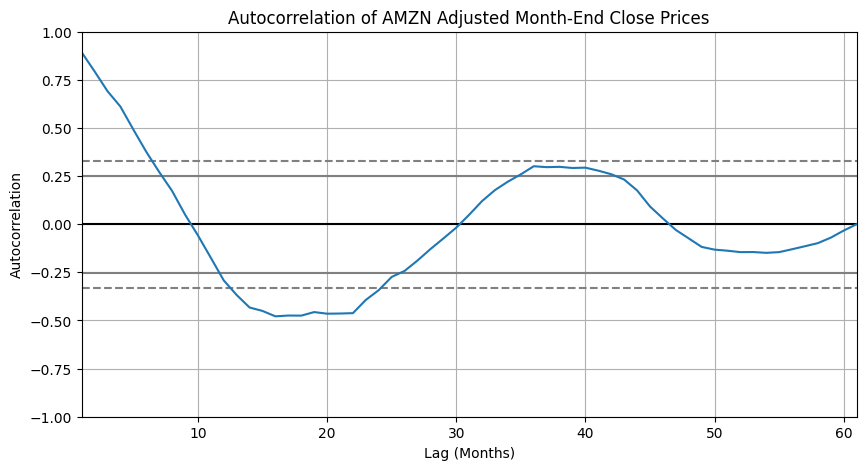

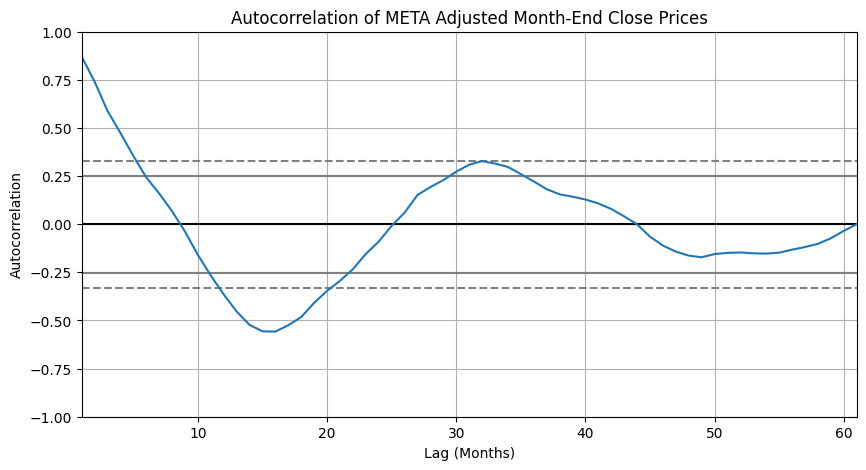

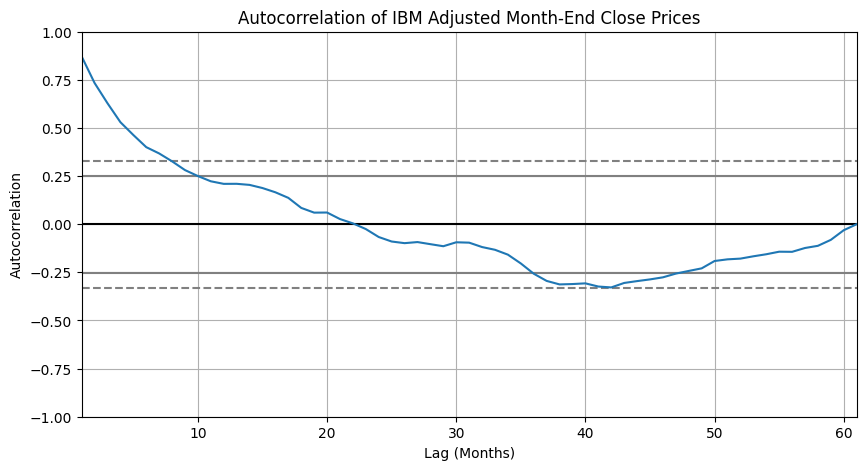

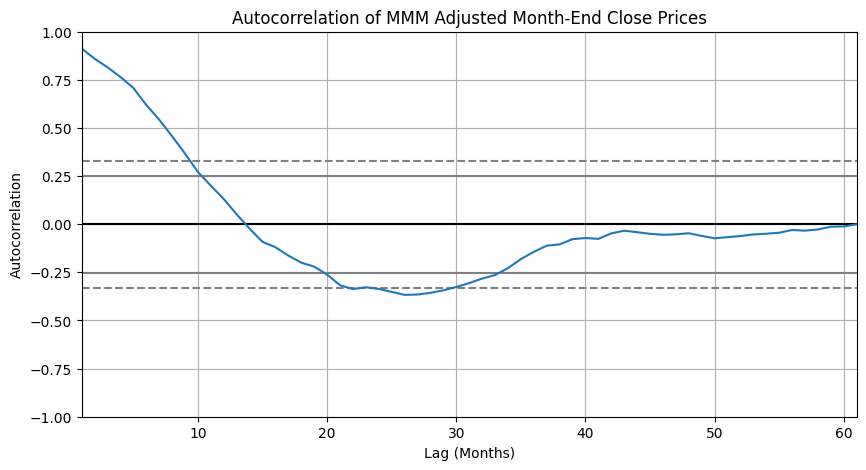

In [ ]:
# Plot autocorrelation for each stock
for ticker in stock_tickers:
    plt.figure(figsize=(10, 5))
    pd.plotting.autocorrelation_plot(monthly_data[ticker])
    plt.title(f'Autocorrelation of {ticker} Adjusted Month-End Close Prices')
    plt.xlabel('Lag (Months)')
    plt.ylabel('Autocorrelation')
    plt.show()

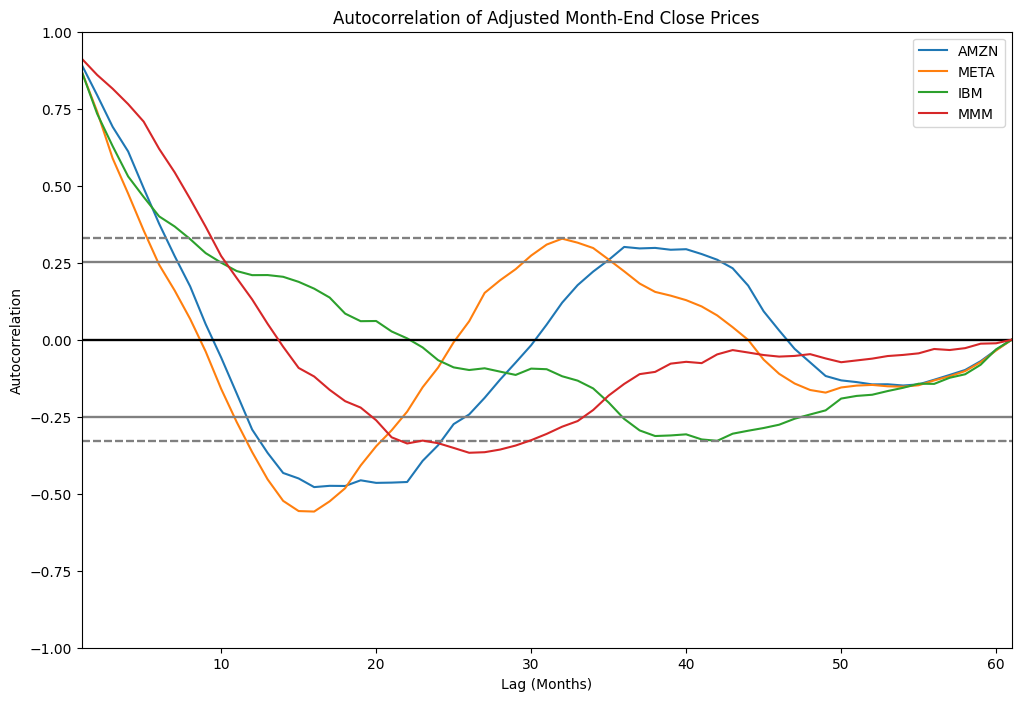

In [ ]:
plt.figure(figsize=(12, 8))
for ticker in stock_tickers:
    pd.plotting.autocorrelation_plot(monthly_data[ticker], label=ticker)

plt.title('Autocorrelation of Adjusted Month-End Close Prices')
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

In [ ]:
'''5. *(4 points)*
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function.
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.'''

'''
Answer: AMZN: Strong initial autocorrelation. No significant autocorrelation after lag 40.
        META: Strong initial autocorrelation. No significant autocorrelation after lag 35.
        IBM: Strong initial autocorrelation. No significant autocorrelation after lag 35.
        MMM: Strong  autocorrelation initially and towars the end. No significant autocorrelation after between lags 25 and 35.
'''

'\nAnswer: AMZN: Strong initial autocorrelation. No significant autocorrelation after lag 40.\n        META: Strong initial autocorrelation. No significant autocorrelation after lag 35.\n        IBM: Strong initial autocorrelation. No significant autocorrelation after lag 35.\n        MMM: Strong  autocorrelation initially and towars the end. No significant autocorrelation after between lags 25 and 35.\n'

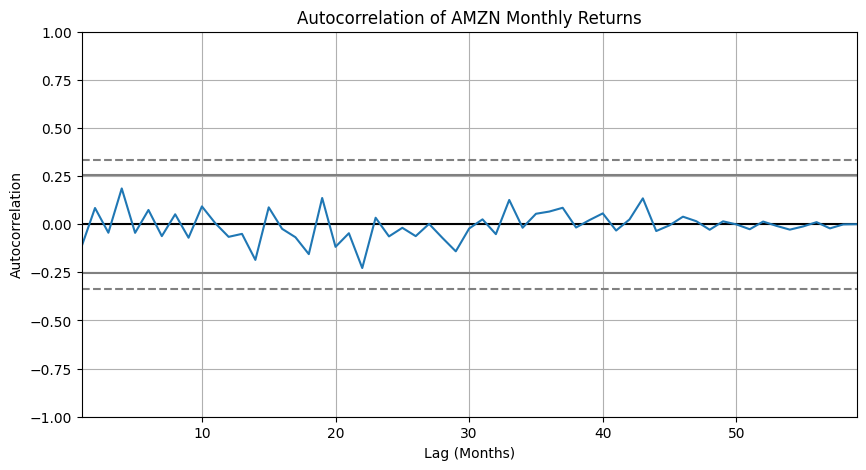

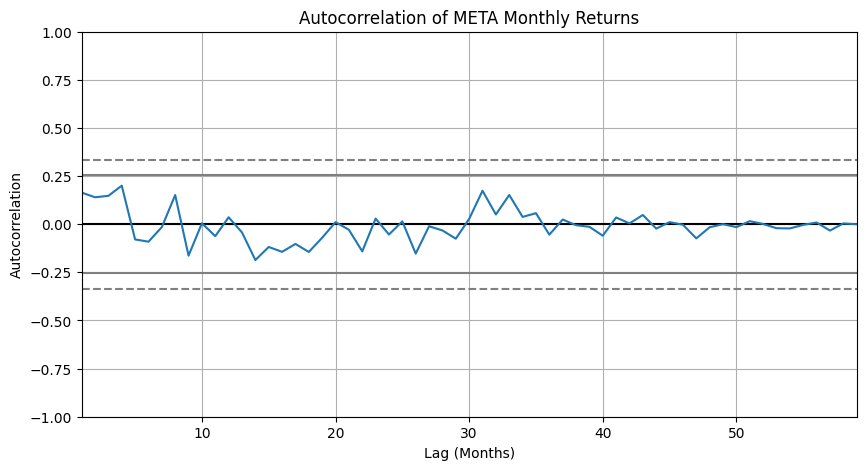

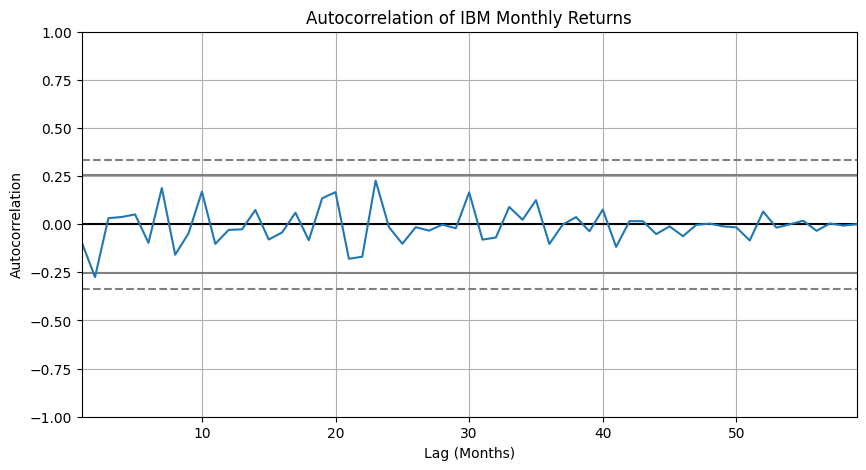

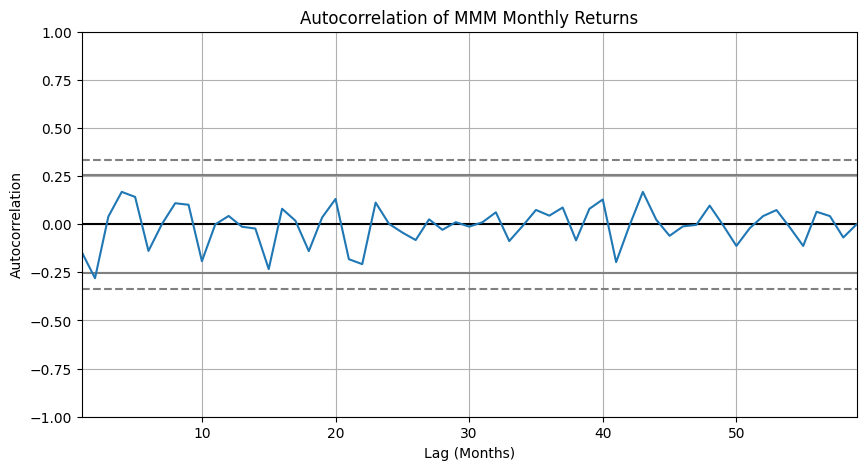

In [ ]:
# Calculate monthly returns using the shift trick
monthly_returns = monthly_data.pct_change().shift(1)

# Plot autocorrelation for each stock's monthly returns
for ticker in stock_tickers:
    plt.figure(figsize=(10, 5))
    pd.plotting.autocorrelation_plot(monthly_returns[ticker].dropna())
    plt.title(f'Autocorrelation of {ticker} Monthly Returns')
    plt.xlabel('Lag (Months)')
    plt.ylabel('Autocorrelation')
    plt.show()

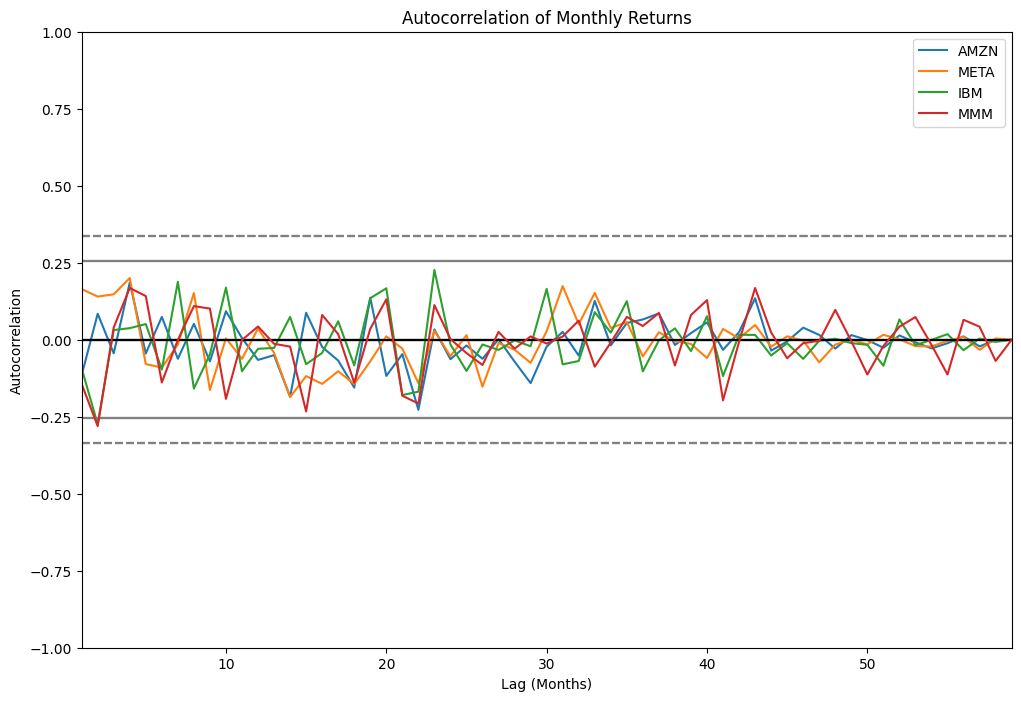

In [ ]:
# Plot autocorrelation for each stock's monthly returns
plt.figure(figsize=(12, 8))
for ticker in stock_tickers:
    pd.plotting.autocorrelation_plot(monthly_returns[ticker].dropna(), label=ticker)

plt.title('Autocorrelation of Monthly Returns')
plt.xlabel('Lag (Months)')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

In [ ]:
#This code calculates the monthly returns for each stock using the "shift trick" (by taking the percentage change and shifting the data by one period). Then, it plots the autocorrelation of the monthly returns for each stock using the autocorrelation_plot() function from pandas.

#Whether the returns are autocorrelated depends on the presence and significance of spikes outside the confidence intervals (dashed lines) in the autocorrelation plots. If significant spikes are observed, it indicates the presence of autocorrelation.

#In financial time series, it's common to observe some level of autocorrelation in returns, especially in short-term fluctuations. Autocorrelation in returns can be indicative of certain patterns or trends persisting over time, which could potentially be exploited in trading strategies. However, it's essential to validate the significance of autocorrelation and consider other factors before making any trading decisions.###

In [ ]:
'''6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?'''
'''
ANSWER: AMZN: Low positive correlation in comparison to META. No correlation in comparison with IBM and MMM.
        META: Low positive correlation AMZN, IBM and MMM.
        IBM: No correlation with AMZN and META. Low positive correlation with MMM.
        MMM: No correlation with AMZN.Low positive correlation with IBM

'''

'\nANSWER: AMZN: Low positive correlation in comparison to META. No correlation in comparison with IBM and MMM.\n        META: Low positive correlation AMZN, IBM and MMM.\n        IBM: No correlation with AMZN and META. Low positive correlation with MMM.\n        MMM: No correlation with AMZN.Low positive correlation with IBM\n\n'

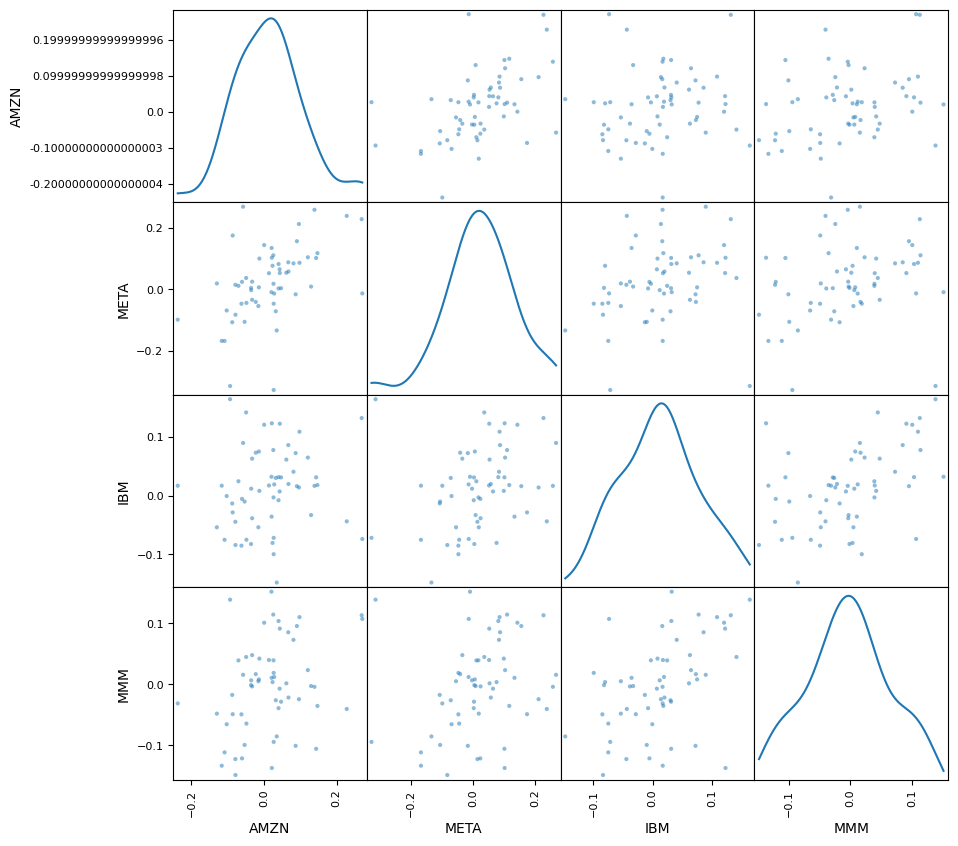

In [ ]:
# Combine all four time series of returns into a single DataFrame
combined_returns = pd.concat([monthly_returns[ticker] for ticker in stock_tickers], axis=1)
combined_returns.columns = stock_tickers

# Visualize the correlation between returns using a scatter plot matrix
scatter_matrix(combined_returns, figsize=(10, 10), diagonal='kde')
plt.show()